In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [66]:
# Cargamos las nuevas imágenes de símbolos
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    labels = []
    for label_folder in os.listdir(folder):
        label_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path).convert('L')  # Escala de grises
                img = img.resize(img_size)  # Redimensionar a un tamaño mayor
                img = np.array(img) / 255.0  # Normalizar
                images.append(img)
                labels.append(label_folder)
    return np.array(images).reshape(-1, img_size[0], img_size[1], 1), np.array(labels)

In [67]:
# Crear un nuevo modelo con más filtros y capas
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),  # Imagen de 64x64 píxeles
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(set(labels)), activation='softmax')  # Ajustar el número de clases
    ])

C:\Users\tomif\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
# Cargar imágenes de tu nueva carpeta
images, labels = load_images_from_folder(r"C:/Users/tomif/Desktop/AI calculadora/extracted_images", img_size=(64, 64))

In [70]:
# Convertir etiquetas de texto a números
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [71]:
# Entrena el modelo
model.fit(images, labels_encoded, epochs=10)

Epoch 1/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 316s 27ms/step - accuracy: 0.8149 - loss: 0.7311
Epoch 2/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 300s 26ms/step - accuracy: 0.9467 - loss: 0.1733
Epoch 3/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 302s 26ms/step - accuracy: 0.9650 - loss: 0.1078
Epoch 4/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 296s 25ms/step - accuracy: 0.9745 - loss: 0.0779
Epoch 5/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 310s 26ms/step - accuracy: 0.9795 - loss: 0.0622
Epoch 6/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 310s 26ms/step - accuracy: 0.9829 - loss: 0.0512
Epoch 7/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 311s 26ms/step - accuracy: 0.9842 - loss: 0.0485
Epoch 8/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 299s 25ms/step - accuracy: 0.9861 - loss: 0.0410
Epoch 9/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 299s 25ms/step - accuracy: 0.9871 - loss: 0.0397
Epoch 10/10
11750/11750 ━━━━━━━━━━━━━━━━━━━━ 301s 26ms/step - accuracy: 0.9875 - loss: 0.0380


In [102]:
# Guardar el modelo completo
# model.save('ruta_a_tu_modelo/modelo_completo.h5')

In [78]:
def load_test_image(image_path, img_size=(64, 64)):
    img = Image.open(image_path).convert('L')  # Escala de grises
    img = img.resize(img_size)  # Redimensionar a 64x64 píxeles
    img = np.array(img) / 255.0  # Normalizar
    return img.reshape(1, img_size[0], img_size[1], 1)  # Añadir batch dimension

In [110]:
# Hacer predicción
test_image = load_test_image(r"C:/Users/tomif/Desktop/AI calculadora/extracted_images/Delta/Delta_91639.jpg")
prediction = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [111]:
# Obtener la clase predicha
predicted_label = np.argmax(prediction)

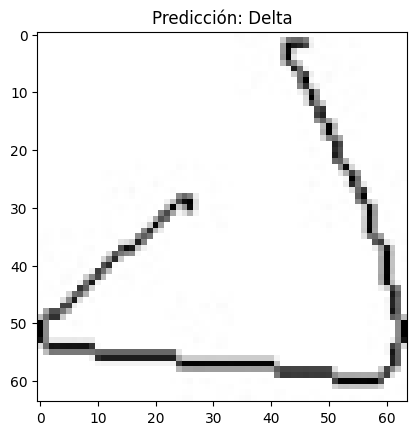

In [112]:
# Mostrar la imagen de prueba y la predicción
plt.imshow(test_image[0], cmap='gray')
plt.title(f"Predicción: {label_encoder.inverse_transform([predicted_label])[0]}")
plt.show()